In [2]:
from data_utils import *
import matplotlib.pyplot as plt
from grad_check import *
from linear_classifier import *

In [5]:
cifar10_dir = 'datasets/'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Training data shape: ', X_train)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

mean_image = np.mean(X_train, axis=0)

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

W = np.random.randn(3073, 10) * 0.0001

loss, grad = svm_loss_vectorized(W, X_dev, y_dev, 0.0)

f = lambda w: svm_loss_vectorized(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_vectorized(W, X_dev, y_dev, 1e2)
f = lambda w: svm_loss_vectorized(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)


svm = LinearSVM()

loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)

Training data shape:  [[[[ 59.  62.  63.]
   [ 43.  46.  45.]
   [ 50.  48.  43.]
   ...
   [158. 132. 108.]
   [152. 125. 102.]
   [148. 124. 103.]]

  [[ 16.  20.  20.]
   [  0.   0.   0.]
   [ 18.   8.   0.]
   ...
   [123.  88.  55.]
   [119.  83.  50.]
   [122.  87.  57.]]

  [[ 25.  24.  21.]
   [ 16.   7.   0.]
   [ 49.  27.   8.]
   ...
   [118.  84.  50.]
   [120.  84.  50.]
   [109.  73.  42.]]

  ...

  [[208. 170.  96.]
   [201. 153.  34.]
   [198. 161.  26.]
   ...
   [160. 133.  70.]
   [ 56.  31.   7.]
   [ 53.  34.  20.]]

  [[180. 139.  96.]
   [173. 123.  42.]
   [186. 144.  30.]
   ...
   [184. 148.  94.]
   [ 97.  62.  34.]
   [ 83.  53.  34.]]

  [[177. 144. 116.]
   [168. 129.  94.]
   [179. 142.  87.]
   ...
   [216. 184. 140.]
   [151. 118.  84.]
   [123.  92.  72.]]]


 [[[154. 177. 187.]
   [126. 137. 136.]
   [105. 104.  95.]
   ...
   [ 91.  95.  71.]
   [ 87.  90.  71.]
   [ 79.  81.  70.]]

  [[140. 160. 169.]
   [145. 153. 154.]
   [125. 125. 118.]
   ...

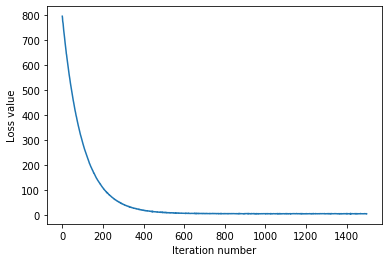

training accuracy: 0.365980
validation accuracy: 0.364000


In [6]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))




